In [1]:
import numpy as np
import math
import pandas as pd 
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

# Загрузка данных

In [2]:
data = pd.read_csv('./telecom_churn.csv')

In [3]:
data.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
# Числовые признаки
num_cols = [
    'AccountWeeks',
    'DataUsage',
    'CustServCalls',
    'DayMins',
    'DayCalls',
    'MonthlyCharge',
    'OverageFee',
    'RoamMins'
]

# Категориальные признаки
cat_cols = [
    'ContractRenewal',
    'DataPlan'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
# Проверю, если NaN-ы
data.isnull().values.any()

False

# Визуализация

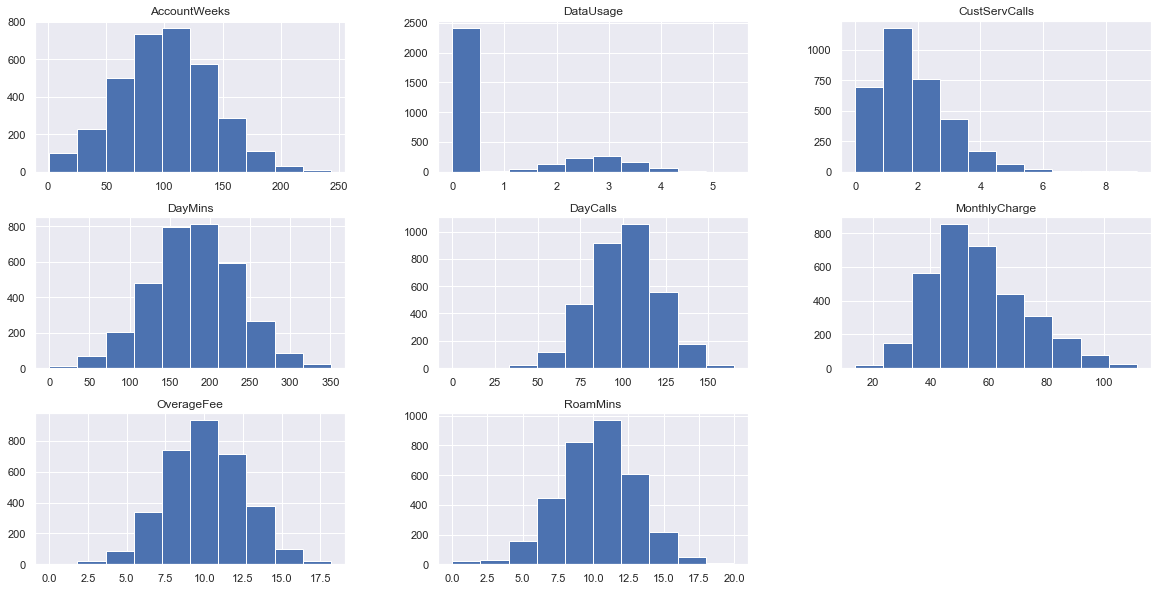

In [7]:
data.hist(column=num_cols, figsize=(20, 10))
None

<Figure size 1080x360 with 0 Axes>

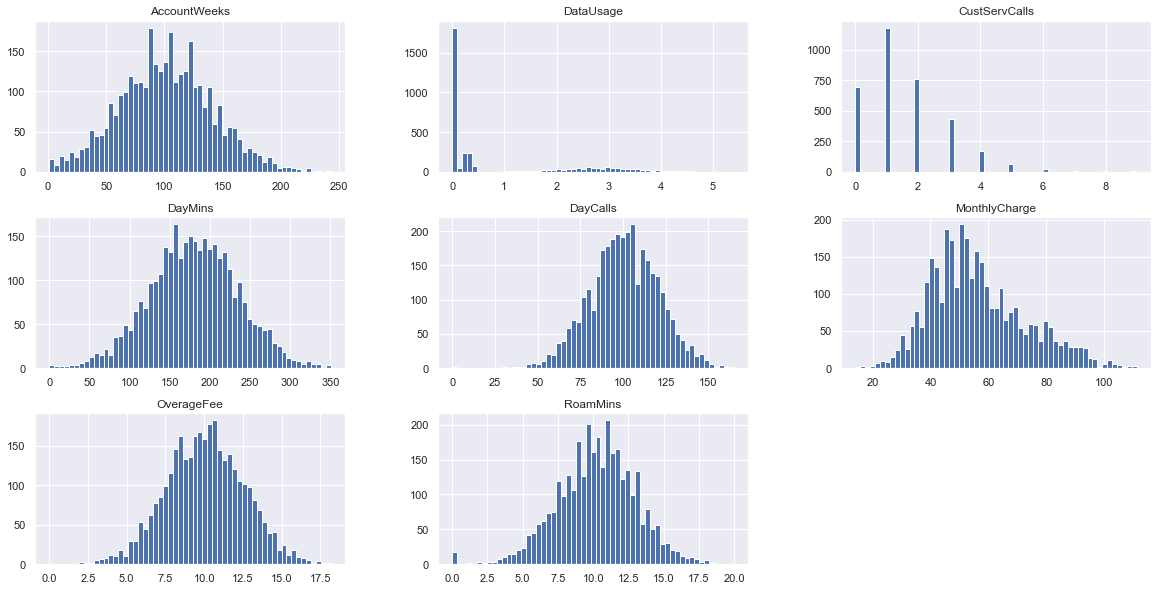

In [8]:
# Более мелкие слобцы
plt.figure(figsize=(15, 5))
binsNum = math.floor(math.sqrt(data.shape[0]))
data.hist(column=num_cols, bins=binsNum, figsize=(20, 10))
None

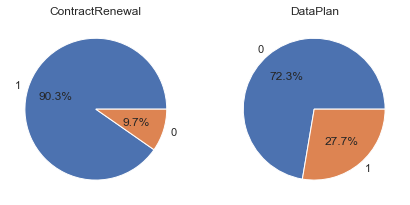

In [9]:
fig = plt.figure(figsize=(15,15))
for i in range(len(cat_cols)):
    cur_col = data[cat_cols[i]].value_counts()
    plt.subplot(4, 4, i+1)
    plt.pie(cur_col, labels=cur_col.index, autopct='%1.1f%%')
    plt.title(cat_cols[i])
plt.show()

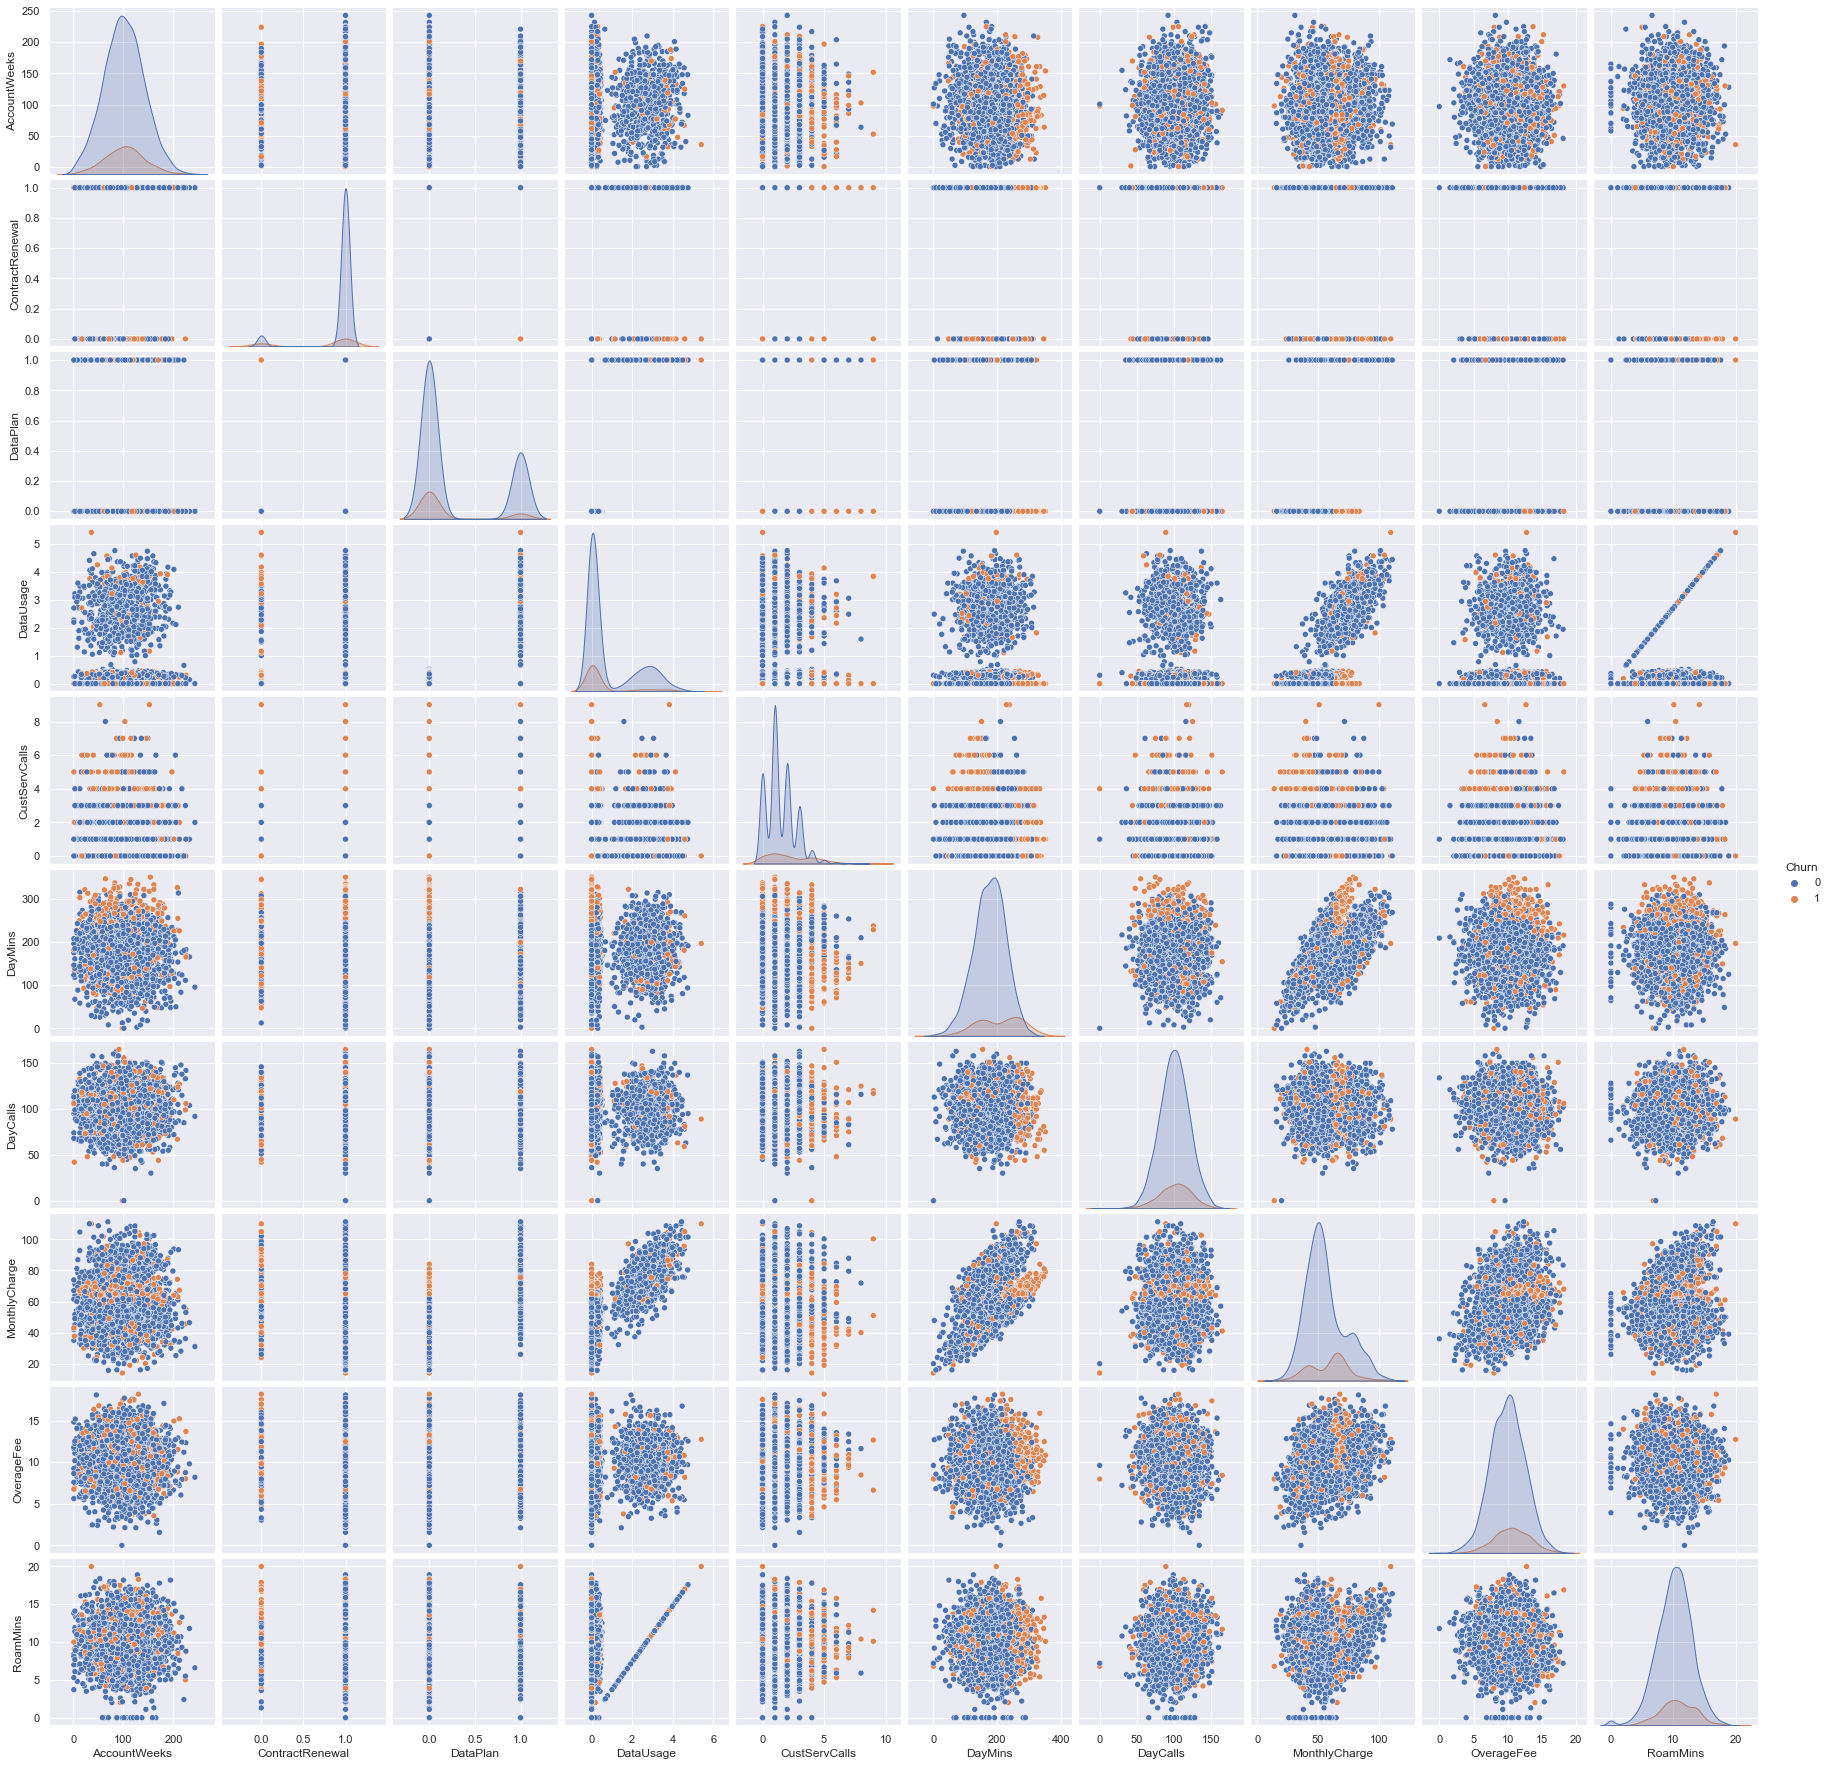

In [10]:
sns.pairplot(data=data, hue=target_col)

In [11]:
data.corrwith(data[target_col])

Churn              1.000000
AccountWeeks       0.016541
ContractRenewal   -0.259852
DataPlan          -0.102148
DataUsage         -0.087195
CustServCalls      0.208750
DayMins            0.205151
DayCalls           0.018459
MonthlyCharge      0.072313
OverageFee         0.092812
RoamMins           0.068239
dtype: float64

<AxesSubplot:>

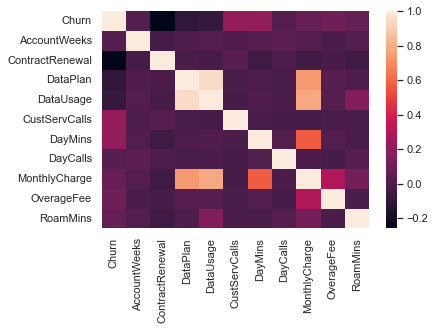

In [12]:
sns.heatmap(data.corr())

<BarContainer object of 2 artists>

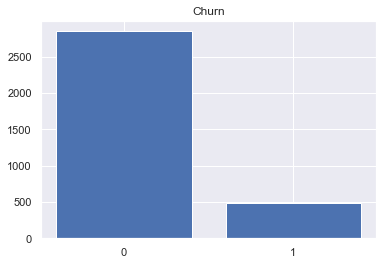

In [13]:
indexes = data[target_col].value_counts().index
counts = data[target_col].value_counts().values
plt.title('Churn')
plt.xticks(indexes)

plt.bar(indexes, counts)

In [14]:
sample = data[data[target_col] == 1]
sample.shape

(483, 11)

In [15]:
while data[data[target_col] == 1].shape[0] + sample.shape[0] < data[data[target_col] == 0].shape[0]:
    data = data.append(sample)
data = data.append(sample.iloc[:data[data[target_col] == 0].shape[0]- \
                               data[data[target_col] == 1].shape[0]])

<BarContainer object of 2 artists>

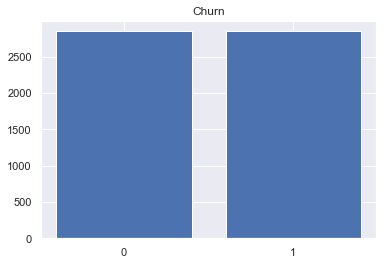

In [16]:
indexes = data[target_col].value_counts().index
counts = data[target_col].value_counts().values
plt.title('Churn')
plt.xticks(indexes)

plt.bar(indexes, counts)